# Sheet 4 Exercise 1: Linear Dynamical System (Credits: 6)
Note: The notebook contains all problems parts of the first exercise. Please create the plots that are asked for in the notebook and type out the corresponding interpretations. All computations are supposed to be carried out by hand! You need to submit your computations to complete the exercise. You can either write your computations into the notebook using LaTeX syntax, or submit them on paper (scan).

Assume a linear dynamical system of the form $\dot{x}(t) = Ax(t)$ with
$$
A =
\begin{pmatrix}
-0.5 & -0.5 & 0 \\
-0.5 & -0.5 & 0 \\
0 & 0 & 2
\end{pmatrix}.
$$

#### 1.1 
Compute the eigenvalues and eigenvectors of $A$.

#### 1.2
Compute and plot the solution of the system for the initial conditions
$$
x_{0,1} = \begin{pmatrix} 1\\1\\0 \end{pmatrix}, \hspace{.5em}
x_{0,2} = \begin{pmatrix} 1\\0\\0 \end{pmatrix}, \hspace{.5em}
x_{0,3} = \begin{pmatrix} 0\\1\\0 \end{pmatrix}, \hspace{.5em}
x_{0,4} = \begin{pmatrix} 0\\0\\10^{-6} \end{pmatrix}.
$$
Explain the behaviour observed in your plot using the eigenvalues and eigenvectors found in 1.1.

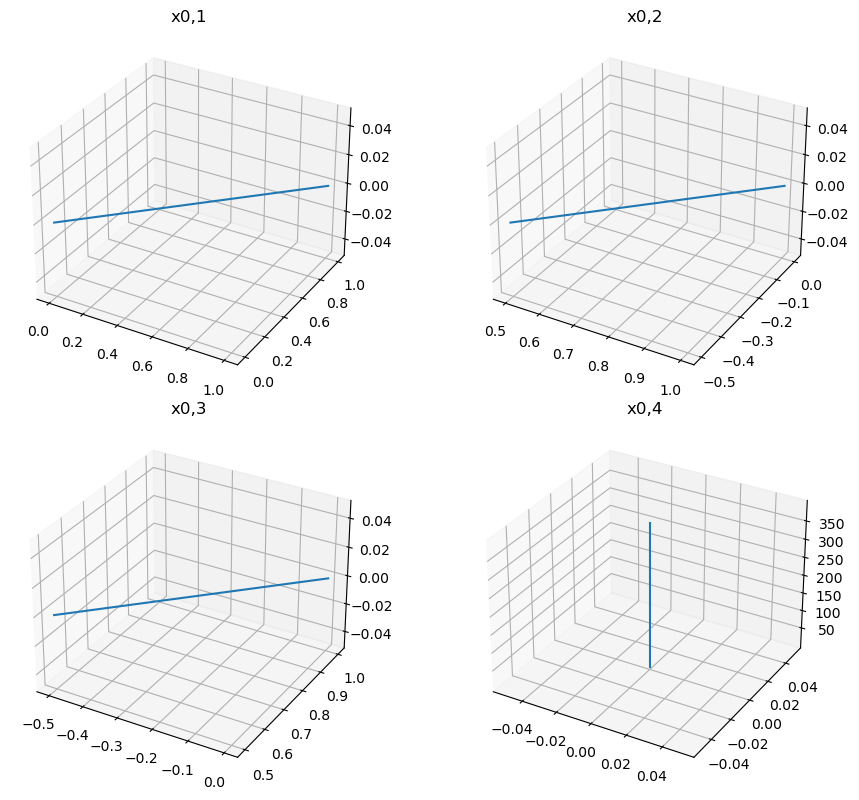

In [7]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[-0.5, -0.5, 0],
              [-0.5, -0.5, 0],
              [0, 0, 2]])

S = np.array([[1, 1, 0],
              [1, -1, 0],
              [0, 0, 1]])

D = np.linalg.inv(S) @ A @ S

x0 = np.array([[1, 1, 0],
                [1, 0, 0],
                [0, 1, 0],
                [0, 0, 1e-6]])

c_x = np.linalg.inv(S) @ x0.T
t = np.arange(0, 10, 0.1)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': '3d'})
for i, ax in enumerate(axs.flatten()):
    x = np.exp(D[0][0] * t)[:, None] * c_x[:, i][0] * S[0] + np.exp(D[1][1] * t)[:, None] * c_x[:, i][1] * S[1] + np.exp(D[2][2] * t)[:, None] * c_x[:, i][2] * S[2]
    ax.plot3D(x[:, 0], x[:, 1], x[:, 2])
    ax.set_title(f'x0,{i+1}')

plt.tight_layout()
plt.show()


**Explanation:** The first initial condition is equal to one of the eigenvectors, which corresponds to a negative eigenvalue -> converges to origin.

The last inital condition corresponds to the last eigenvector (negative eigenvalue) -> unstable -> diverges. 

The other two inital conditions are a linear combination of the first two eigenvectors (eigenvalues: 0, -1) -> convergence to a fixed point. 

#### 1.3
Plot the vector field of the dynamical system as a quiver plot in the three projection planes defined respectively by
1. $x_3 = 0$,
2. $x_2 = 0$,
3. $x_1 = 0$.

Explain the solutions observed in 1.2 using the quiver plots.

*Hint:* Matplotlib has a built-in function for quiver plots. An explanation of how it works can be found here: https://www.geeksforgeeks.org/quiver-plot-in-matplotlib/. For a given plane, take vectors $x$ from the plane and project the corresponding $\dot{x}$ into the plane.

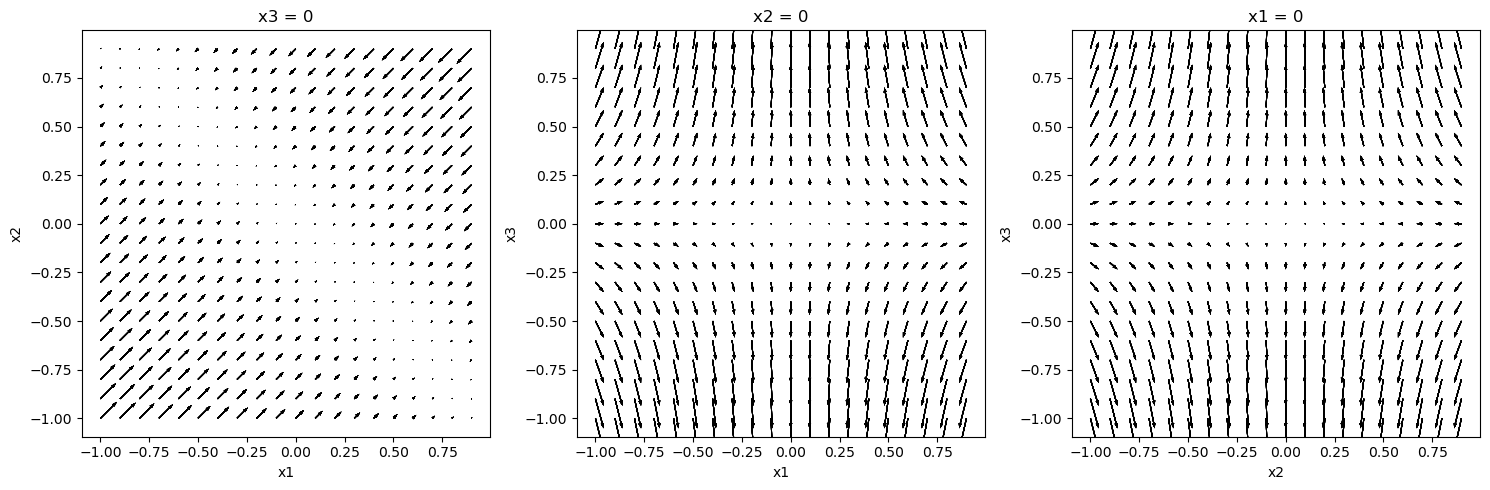

In [2]:

x = y = z =  np.arange(-1, 1, 0.1)
X, Y, Z = np.meshgrid(x, y, z)

fig, (ax1, ax2, ax3)  = plt.subplots(1,3, figsize = (15, 5))

# x3 = 0
U, V, W = np.dot(A, np.array([X.flatten(), Y.flatten(), np.zeros_like(Z.flatten())]))
ax1.quiver(X, Y, U, V, scale=25)
ax1.set_title('x3 = 0')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

# Vector field for x2 = 0
U, V, W = np.dot(A, np.array([X.flatten(), np.zeros_like(Y.flatten()), Z.flatten()]))
ax2.quiver(X, Z, U, W, scale=25)
ax2.set_title('x2 = 0')
ax2.set_xlabel('x1')
ax2.set_ylabel('x3')

# Vector field for x1 = 0
U, V, W = np.dot(A, np.array([np.zeros_like(X.flatten()), Y.flatten(), Z.flatten()]))
ax3.quiver(Y, Z, V, W, scale=25)
ax3.set_title('x1 = 0')
ax3.set_xlabel('x2')
ax3.set_ylabel('x3')
plt.tight_layout()
plt.show()


**Explanation:** In the first plot, there is convergence due to the negative eigenvalue, which explains the first three inital conditions which go towards the fixed point described by x1 + x2 = 0.
The other two plots explains the third initial conditions (positive eigenvalue): divergence, Fixed point x3=x1=x2=0.

#### 1.4
Plot the vector field of the dynamics in the projection on the plane defined by
$$
e_1 = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\-1\\0 \end{pmatrix}, \hspace{.5em}
e_2 = \begin{pmatrix} 0\\0\\1 \end{pmatrix}.
$$
How can this result be explained?

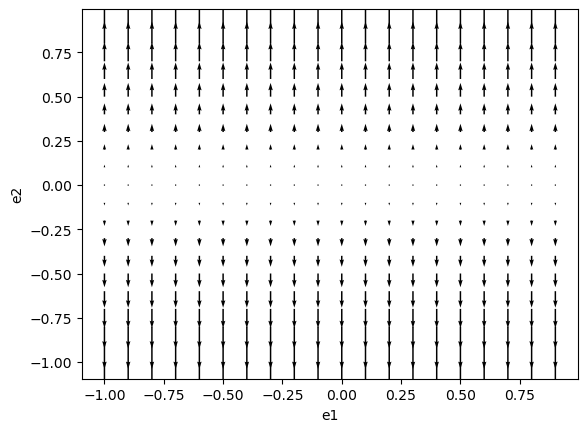

In [3]:
e1 = (1/np.sqrt(2)) * np.array([1, -1, 0])
e2 = np.array([0, 0, 1])

x = y =  np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(x, y)

X1_dot = np.zeros_like(X)
X2_dot = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i, j] * e1 + Y[i, j] * e2
        x_dot = A @ x
        X1_dot[i, j] = x_dot @ e1
        X2_dot[i, j] = x_dot @ e2

fig, ax = plt.subplots()
ax.quiver(X, Y, X1_dot, X2_dot)
ax.set_xlabel('e1')
ax.set_ylabel('e2')
plt.show()


**Explanation:** e1 and e2 are both eigenvectors with eigenvalues 0 and 2 -> unstable and divergence. 

#### 1.5
Now consider a system with constant input, namely $\dot{x}(t) = Ax(t) + s(t)$ where A is as before and $s(t) = (1,2,0)^T$. Compute the solution for the initial condition $(0,0,0)^T$. Plot the solution projected onto the planes defined by

1. $x_3 = 0$,
2. the plane from 1.4.

What do you observe?

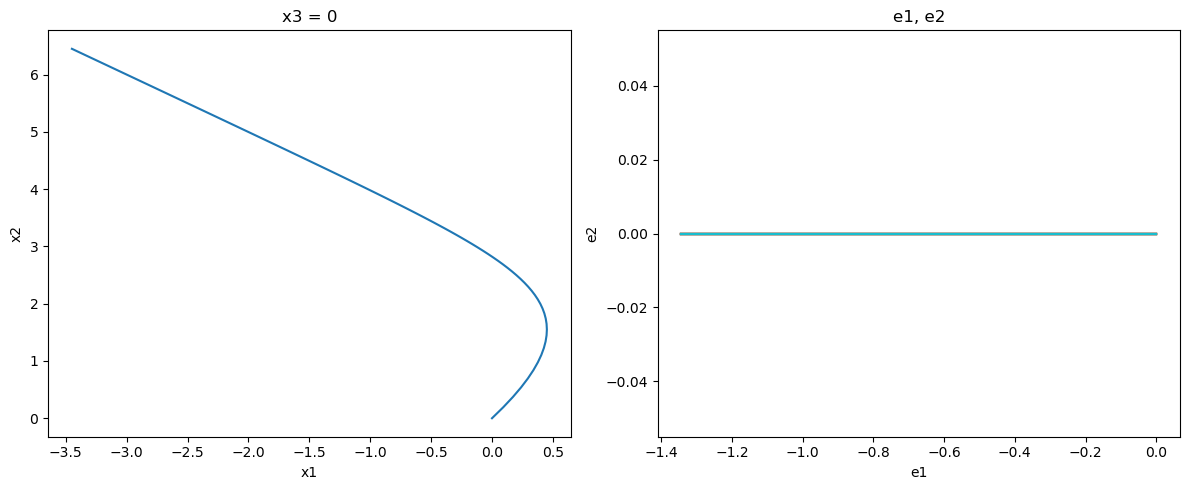

In [4]:
from scipy.integrate import odeint

s = np.array([1, 2, 0])

def func(x, t):
    return np.dot(A, x) + s

x0 = np.array([0, 0, 0])

t = np.arange(0, 10, 0.1)
solution = odeint(func, x0, t)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# x3 = 0
ax1.plot(solution[:, 0], solution[:, 1], label='x2')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('x3 = 0')

# e1, e2
x = y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(x, y)

X1_dot = np.zeros_like(X)
X2_dot = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X1_dot[i, j] = solution[i, :] @ e1
        X2_dot[i, j] = solution[i, :] @ e2

ax2.plot(X1_dot, X2_dot)
ax2.set_xlabel('e1')
ax2.set_ylabel('e2')
ax2.set_title('e1, e2')

plt.tight_layout()
plt.show()


**Explanation:** Introudcues constant input to the system, system flows in the direction of e1. 